In [339]:
import cl2pd # do "pip install --user git+https://github.com/sterbini/cl2pd.git" to install
from cl2pd import importData
from cl2pd import plotFunctions
from cl2pd import dotdict

dotdict=dotdict.dotdict

pd=importData.pd     # is the pandas package
np=importData.np     # is the numpy package
cals=importData.cals # pytimber log class

import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display
mySource='/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/BB linearization.ipynb'

# Introduction
The LHC B1 and B2 optics at collision for vdM scan are in the following files

/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b1DF.pickle 

and

/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b2DF.pickle

See appendix to see how to compute it.

In [620]:
# loading the optics
b1DF=pd.read_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b1DF.pickle')
b2DF=pd.read_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b2DF.pickle')
# retrieving the tunes
B1Q1=b1DF['mux'].values[-1]
B1Q2=b1DF['muy'].values[-1]
B2Q1=b2DF['mux'].values[-1]
B2Q2=b2DF['muy'].values[-1]
print(f'B1 H tune: {B1Q1}')
print(f'B1 V tune: {B1Q2}')
print(f'B2 H tune: {B2Q1}')
print(f'B2 V tune: {B2Q2}')

B1 H tune: 64.30999990167555
B1 V tune: 59.32000002670684
B2 H tune: 64.30999990605301
B2 V tune: 59.32000002843799


In [621]:
# filling a useful dictionary

# B1
B1=dotdict()
B1.atIP1=b1DF['name']=='ip1:1'
B1.atIP2=b1DF['name']=='ip2:1'
B1.atIP5=b1DF['name']=='ip5:1'
B1.atIP8=b1DF['name']=='ip8:1'
B1.atIP1l=b1DF['name']=='ip1.l1:1'


# B2
B2=dotdict()
B2.atIP1=b2DF['name']=='ip1:1'
B2.atIP2=b2DF['name']=='ip2:1'
B2.atIP5=b2DF['name']=='ip5:1'
B2.atIP8=b2DF['name']=='ip8:1'
B2.atIP1l=b2DF['name']=='ip1.l1:1'


In [622]:
# B1 summary
# A second iteration is needed for the crossing angles
b1DF[B1.atIP1 | B1.atIP2 | B1.atIP5 | B1.atIP8| B1.atIP1l][['name','s','betx','mux','bety','muy','x','px','y','py','dx','dpx']]

,name,s,betx,mux,bety,muy,x,px,y,py,dx,dpx
2,ip1:1,0.000000,19.111772,0.000000,19.263422,0.000000,2.113142e-11,-5.498155e-10,1.853215e-13,5.941750e-16,-0.028090,-0.001066
1915,ip2:1,3332.436584,18.862944,8.295954,18.929029,7.669167,-3.952944e-09,3.146737e-07,-8.881135e-14,1.953840e-04,-0.018981,0.001521
7082,ip5:1,13329.289233,19.169696,31.975690,19.187829,29.648602,5.458546e-09,-1.066356e-10,-7.739360e-14,-8.773290e-15,-0.015047,-0.001544
12226,ip8:1,23315.378984,24.114956,56.064831,23.903805,51.017069,9.728519e-09,-4.653714e-04,-7.972307e-14,-1.948947e-06,-0.013657,-0.000533
14121,ip1.l1:1,26658.883200,19.111772,64.310000,19.263422,59.320000,2.113175e-11,-5.498156e-10,1.853263e-13,5.942067e-16,-0.028090,-0.001066


In [623]:
# B2 summary
# A second iteration is needed for the crossing angles
b2DF[B2.atIP1 | B2.atIP2 | B2.atIP5 | B2.atIP8 | B2.atIP1l][['name','s','betx','mux','bety','muy','x','px','y','py','dx','dpx']]

,name,s,betx,mux,bety,muy,x,px,y,py,dx,dpx
2,ip1:1,0.000000,19.344438,0.000000,19.202845,0.000000,1.318599e-09,3.206612e-10,-3.110492e-16,-4.595978e-16,0.028278,-0.000782
1885,ip2:1,3332.284216,18.856456,8.272802,18.964904,7.957720,1.414372e-09,-3.146772e-07,1.494844e-16,-1.953840e-04,-0.019935,-0.001338
7088,ip5:1,13329.593967,19.097400,31.984398,19.200269,29.761319,9.112668e-10,8.830686e-12,-2.883859e-15,4.358412e-16,0.021519,-0.000772
12200,ip8:1,23315.226616,24.347550,55.799011,23.946384,51.715754,9.095175e-10,4.653711e-04,-5.722683e-15,1.948947e-06,-0.018350,0.000042
14125,ip1.l1:1,26658.883200,19.344438,64.310000,19.202845,59.320000,1.318599e-09,3.206612e-10,-3.200929e-16,-4.597983e-16,0.028278,-0.000782


In [624]:
auxB1=b1DF[B1.atIP1 | B1.atIP2 | B1.atIP5 | B1.atIP8| B1.atIP1l][['name','mux','muy']]
auxB1

,name,mux,muy
2,ip1:1,0.000000,0.000000
1915,ip2:1,8.295954,7.669167
7082,ip5:1,31.975690,29.648602
12226,ip8:1,56.064831,51.017069
14121,ip1.l1:1,64.310000,59.320000


In [625]:
auxB2=b2DF[B2.atIP1 | B2.atIP2 | B2.atIP5 | B2.atIP8| B2.atIP1l][['name','mux','muy']]
auxB2

,name,mux,muy
2,ip1:1,0.000000,0.000000
1885,ip2:1,8.272802,7.957720
7088,ip5:1,31.984398,29.761319
12200,ip8:1,55.799011,51.715754
14125,ip1.l1:1,64.310000,59.320000


In [626]:
myDict={'IPs':['IP1','IP2','IP5','IP8','IP1.L1'],'mux_B1': auxB1['mux'].values,'muy_B1': auxB1['muy'].values,
       'mux_B2': auxB2['mux'].values,'muy_B2': auxB2['muy'].values}
pd.DataFrame(myDict)

,IPs,mux_B1,muy_B1,mux_B2,muy_B2
0,IP1,0.000000,0.000000,0.000000,0.000000
1,IP2,8.295954,7.669167,8.272802,7.957720
2,IP5,31.975690,29.648602,31.984398,29.761319
3,IP8,56.064831,51.017069,55.799011,51.715754
4,IP1.L1,64.310000,59.320000,64.310000,59.320000


We can approximate the linear effect of the BB encouters by reducing the BB force to a dipolar and quadrupolar kick (linear approximation). Starting from that one can compute the induced orbit distorsion and $\beta$-beating.

From  Section 4.5.1. of A. Chao et al., Handbook of Accelerator Physics and Engineering one can express the closed orbit and beat-beating produced by a distribution of dipolar and quadrupolar kicks (**perturbative approach**). For convenience we report hereby the formulas and we suggest to refer to the book for the variables' description.

The closed-orbit distorsion produced by a series of dipolar kicks is 

\begin{equation}
 \Delta x(s) =\frac{\sqrt{\beta(s)}}{2 \sin (\pi \nu)} \sum_{i=1}^{N} \theta_{i} \sqrt{\beta\left(s_{i}\right)} \times \cos \left(\left|\phi(s)-\phi\left(s_{i}\right)\right|-\pi \nu\right) 
\end{equation}



The beta-wave produced by a series of quadrupolar kicks is 
\begin{equation}
\frac{\Delta \beta(s)}{\beta(s)} =\frac{1}{2 \sin (2 \pi \nu)} \sum_{i=1}^{N}(\Delta K l)_{i} \beta\left(s_{i}\right) \times \cos \left(2\left|\phi(s)-\phi\left(s_{i}\right)\right|-2 \pi \nu\right)
\end{equation}

and the induced tune change is
\begin{equation}
\Delta \nu=-\frac{\beta\left(s_{i}\right)}{4 \pi}(\Delta K l)_{i}.
\end{equation}


The $(\Delta K l)_{i}$ corresponding to a BB effect is 
\begin{equation}
\Delta K l = \frac{1}{\beta_{IP}}\frac{N r_0}{\gamma  \epsilon}.
\end{equation}


In [627]:
# BB kick



In [152]:
# Example of tune shift
beta_IP= b1DF[atIP1]['betx'].values[0]
N=0.8e11
r0=1.534689e-18
gammaepsilon=4e-6
Dkl=1/beta_IP*N*r0/gammaepsilon
-Dkl*beta_IP/4/np.pi

-0.0024425334045875776

In [153]:
# Function to compute beta-beating
def BetaBeating(name='ip1:1',df=b1DF, N=0.8e11, gammaepsilon=4e-6) :
    r0=1.534689e-18
    nameDF=df[df['name']==name]
    
    beta_x=nameDF['betx'].values
    mu_x=nameDF['mux'].values
    Dkl_x=1/beta_x*N*r0/gammaepsilon
    Qx=df['mux'].values[-1]
    
    beta_y=nameDF['bety'].values
    mu_y=nameDF['muy'].values
    Dkl_y=1/beta_y*N*r0/gammaepsilon
    Qy=df['muy'].values[-1]
    
    output={'s':df['s'],\
            'name':df['name'],\
            'betaBeating_X':1/2/np.sin(2*np.pi*Qx)*Dkl_x*beta_x* np.cos(2*np.pi*np.abs(df['mux']-mu_x)-2*np.pi*Qx),\
            'betaBeating_Y':1/2/np.sin(2*np.pi*Qy)*Dkl_y*beta_y* np.cos(2*np.pi*np.abs(df['muy']-mu_y)-2*np.pi*Qy),\
            }
    return output

### IP1 HO BB effect

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,-0.006456,-0.007673
1915,3332.436584,ip2:1,0.017469,-0.010516
7082,13329.289233,ip5:1,-0.008862,-0.008543
12226,23315.378984,ip8:1,0.000532,-0.005884


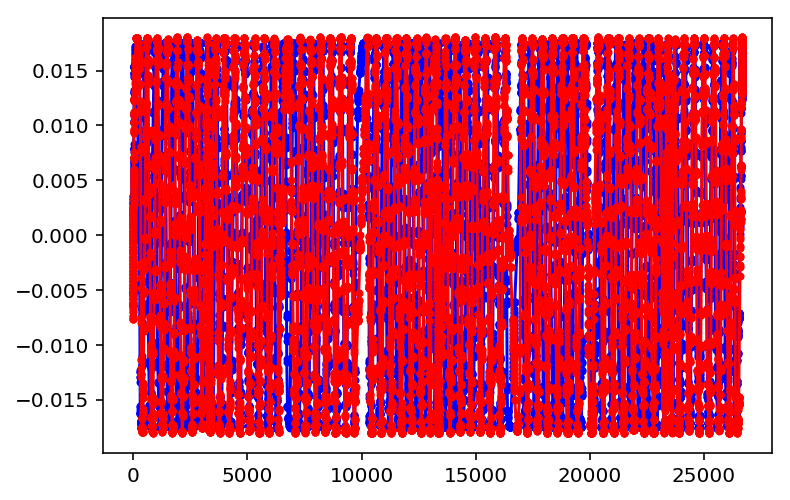

In [459]:
# The beta-beating from IP1 HO B1
aux=BetaBeating(name='ip1:1',df=b1DF, N=0.85e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B1.atIP1 | B1.atIP2 | B1.atIP5 | B1.atIP8]

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,-0.006076,-0.007222
1885,3332.284216,ip2:1,0.016057,-0.010998
7088,13329.593967,ip5:1,-0.007549,-0.015821
12200,23315.226616,ip8:1,-0.016467,-0.013451


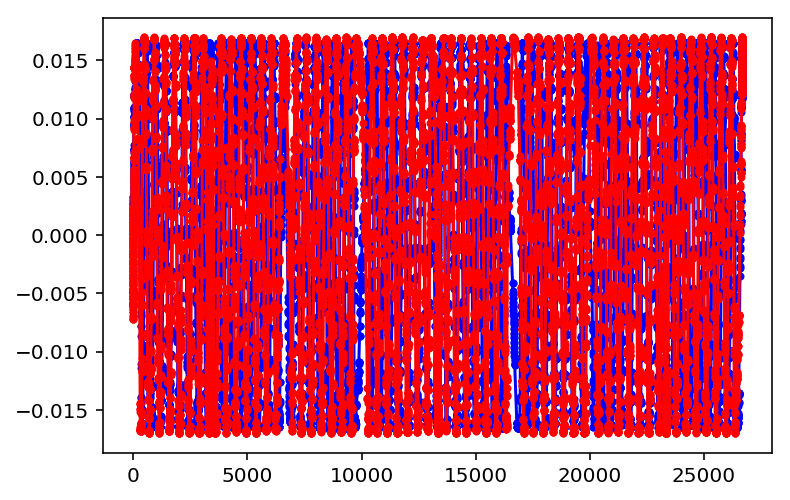

In [155]:
# The beta-beating from IP1 HO B2
aux=BetaBeating(name='ip1:1',df=b2DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B2.atIP1 | B2.atIP2 | B2.atIP5 | B2.atIP8]
#  NB: the indicued beta-beating in IP5 is differnt from B1 and B2.

### IP2 HO BB effect

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,0.016442,-0.009898
1915,3332.436584,ip2:1,-0.006076,-0.007222
7082,13329.289233,ip5:1,-0.011279,-0.009139
12226,23315.378984,ip8:1,-0.015958,0.016701


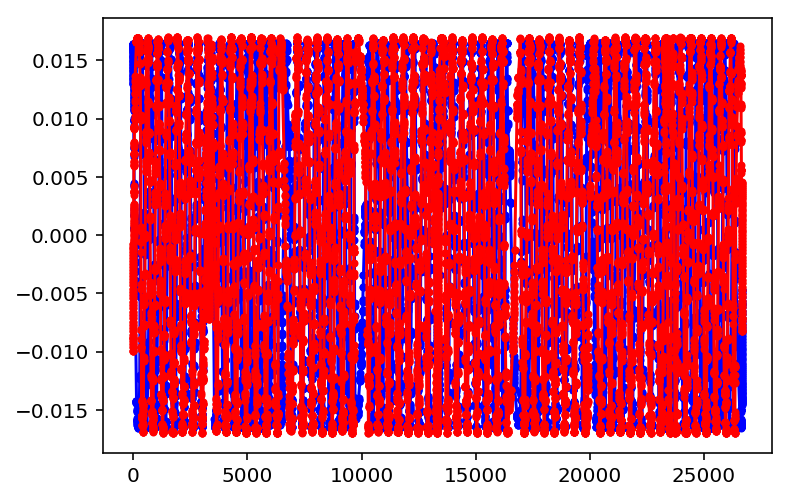

In [156]:
# The beta-beating from IP2 HO B1
aux=BetaBeating(name='ip2:1',df=b1DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B1.atIP1 | B1.atIP2 | B1.atIP5 | B1.atIP8]

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,0.016057,-0.010998
1885,3332.284216,ip2:1,-0.006076,-0.007222
7088,13329.593967,ip5:1,-0.013450,-0.016871
12200,23315.226616,ip8:1,0.003478,-0.015692


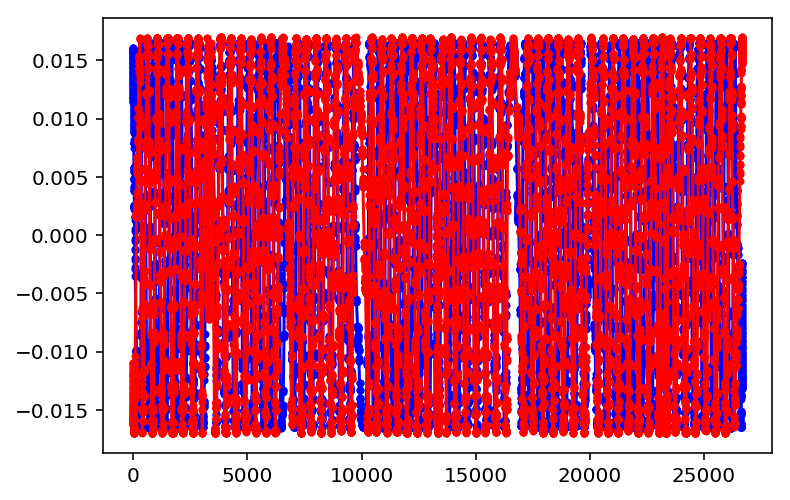

In [157]:
# The beta-beating from IP2 HO B2
aux=BetaBeating(name='ip2:1',df=b2DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B2.atIP1 | B2.atIP2 | B2.atIP5 | B2.atIP8]

### IP5 HO BB effect

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,-0.008341,-0.008040
1915,3332.436584,ip2:1,-0.011279,-0.009139
7082,13329.289233,ip5:1,-0.006076,-0.007222
12226,23315.378984,ip8:1,0.003005,0.016181


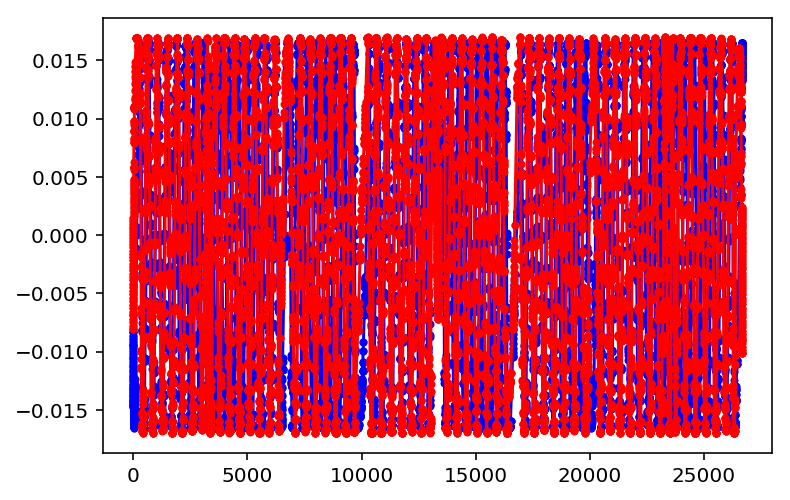

In [158]:
# The beta-beating from IP5 HO B1
aux=BetaBeating(name='ip5:1',df=b1DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B1.atIP1 | B1.atIP2 | B1.atIP5 | B1.atIP8]

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,-0.007549,-0.015821
1885,3332.284216,ip2:1,-0.013450,-0.016871
7088,13329.593967,ip5:1,-0.006076,-0.007222
12200,23315.226616,ip8:1,-0.016499,-0.011262


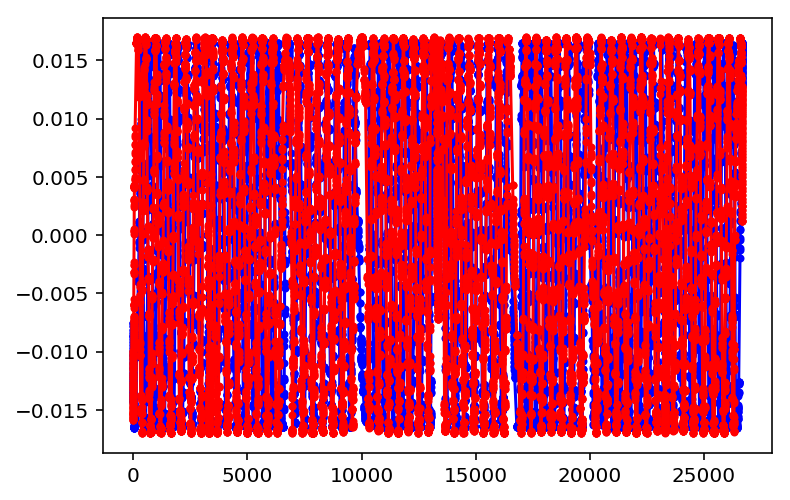

In [159]:
# The beta-beating from IP5 HO B2
aux=BetaBeating(name='ip5:1',df=b2DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B2.atIP1 | B2.atIP2 | B2.atIP5 | B2.atIP8]

### IP8 HO BB effect

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,0.000501,-0.005537
1915,3332.436584,ip2:1,-0.015958,0.016701
7082,13329.289233,ip5:1,0.003005,0.016181
12226,23315.378984,ip8:1,-0.006076,-0.007222


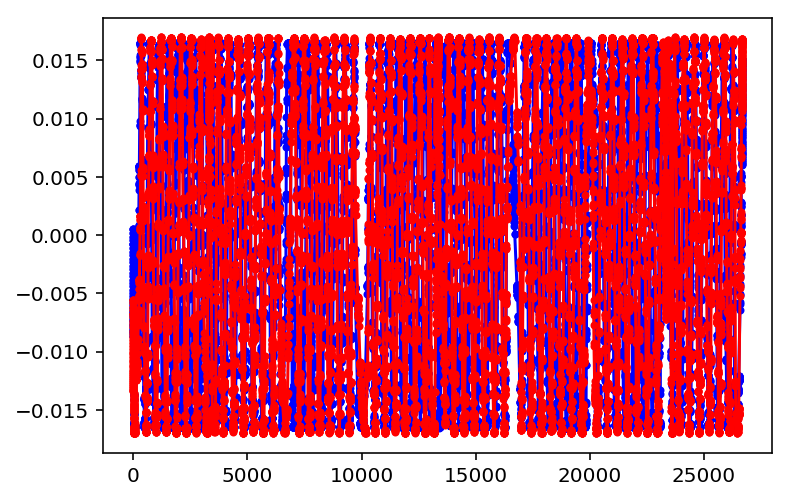

In [160]:
# The beta-beating from IP5 HO B1
aux=BetaBeating(name='ip8:1',df=b1DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B1.atIP1 | B1.atIP2 | B1.atIP5 | B1.atIP8]

,s,name,betaBeating_X,betaBeating_Y
2,0.000000,ip1:1,-0.016467,-0.013451
1885,3332.284216,ip2:1,0.003478,-0.015692
7088,13329.593967,ip5:1,-0.016499,-0.011262
12200,23315.226616,ip8:1,-0.006076,-0.007222


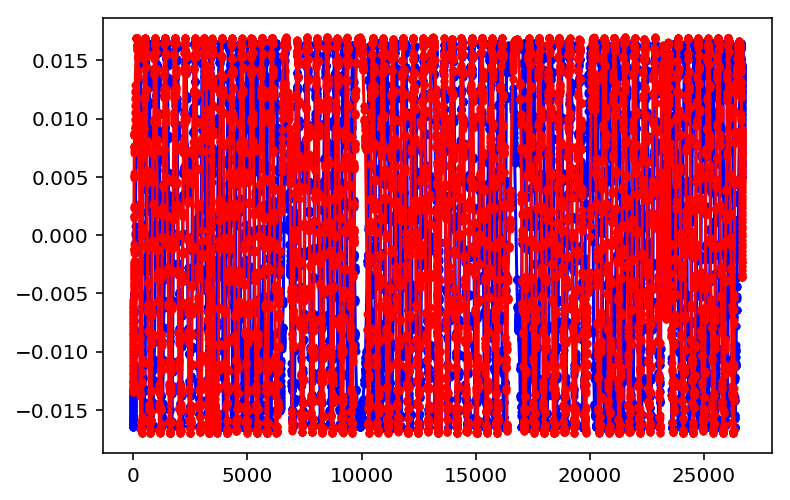

In [161]:
# The beta-beating from IP8 HO B2
aux=BetaBeating(name='ip8:1',df=b2DF, N=0.8e11, gammaepsilon=4e-6)
plt.plot(aux['s'],aux['betaBeating_X'],'.-b')
plt.plot(aux['s'],aux['betaBeating_Y'],'.-r')
pd.DataFrame(aux)[B2.atIP1 | B2.atIP2 | B2.atIP5 | B2.atIP8]

# Appendix
## Computing the MAD-X vdM optics

In [493]:
from cpymad.madx import Madx
from matplotlib import pyplot as plt

In [609]:
myString='''
! Sequence definition
Option, -echo,-warn,-info;

call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/const_for_aperture.madx";
call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/lhc_as-built.seq";

! Aperture definition

call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/aperture_as-built.b1.madx";
call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/aperture_as-built.b2.madx";
call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/aper_tol_as-built.b1.madx";
call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/aper_tol_as-built.b2.madx";
call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/exp_pipe_model_after_LS1.madx";
call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/aperture/exp_pipe_install_after_LS1.madx";


! Beam definition
beam, sequence=lhcb1, bv= 1,
  particle=proton, charge=1, mass=0.938272046,
  energy= 6500,   npart=0.85e11,kbunch=2748,
  ex=5.773983446153845e-10,ey=5.773983446153845e-10;
beam, sequence=lhcb2, bv=-1,
  particle=proton, charge=1, mass=0.938272046,
  energy= 6500,   npart=0.85e11,kbunch=2748,
  ex=5.773983446153845e-10,ey=5.773983446153845e-10;

! Strength definition

call, file="/eos/project/a/abpdata/lhc/optics/runII/2015/opt_19200_19000_19200_24000_coll.madx";

nrj=beam%lhcb1->pc/beam%lhcb1->charge;

! Cycle
!seqedit,sequence=lhcb1;flatten;cycle,start=s.ds.l1.b1;endedit;
!seqedit,sequence=lhcb2;flatten;cycle,start=s.ds.l1.b2;endedit;


on_x1=0;
!on_sep1= 1;
!on_o1= 1;

!on_x2=0;
!on_x5=0;
!on_sep5= 1;

!on_x8=0;
!on_alice=0;
!on_lhcb=0;

!on_o1= 1;
!on_o5= 1;

use, sequence=lhcb1;
twiss, table=twiss_ipb1_flat;

!on_o1= -1;
!on_o5= -1;
use, sequence=lhcb2;
twiss, table=twiss_ipb2_flat;
'''

In [610]:
myMad = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.04.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2018.10.03               +
  + Execution date: 2019.07.09 14:25:29      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [611]:
myMad.input(myString)

enter Twiss module
  
iteration:   1 error:   9.799106E-09 deltap:   0.000000E+00
orbit:   2.113142E-11 -5.498155E-10  1.853215E-13  5.941750E-16  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
        26658.8832                 -0    0.0003202035632         55.8839274 

                q1                dq1            betxmax              dxmax 
        64.3099999        3.000000081         593.511501        2.720741309 

             dxrms             xcomax             xcorms                 q2 
       1.344104535      0.01545439912    0.0009885626162        59.32000003 

               dq2            betymax              dymax              dyrms 
       2.999999801        609.8696062      0.08306143938      0.02435661783 

            ycomax             ycorms             deltap            synch_1 
    0.005999946193    0.0003819036218                  0                  0 

           synch_2            

True

In [612]:
for i in ['on_sep1','on_x1','on_o1',\
          'on_sep2','on_x2','on_o2',\
          'on_sep5','on_x5','on_o5',\
          'on_sep8','on_x8','on_o8',
          'on_alice', 'on_lhcb']:
    print(f"{i}: {myMad.globals[i]}")

on_sep1: 0.0
on_x1: 0.0
on_o1: 0.0
on_sep2: 0.0
on_x2: 120.0
on_o2: 0.0
on_sep5: 0.0
on_x5: 0.0
on_o5: 0.0
on_sep8: 0.0
on_x8: -320.0
on_o8: 0.0
on_alice: 1.0769230881428886
on_lhcb: -1.0769230881428886


In [613]:
b1DF=myMad.table.twiss_ipb1_flat.dframe()
b2DF=myMad.table.twiss_ipb2_flat.dframe()

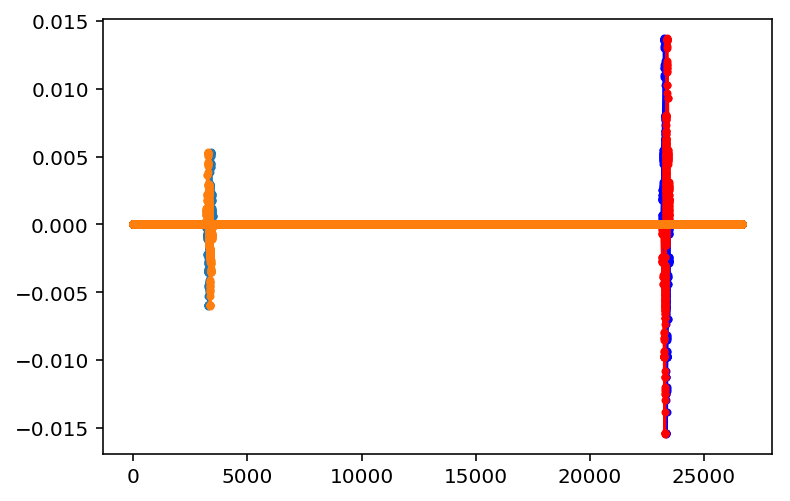

In [615]:
plt.plot(b1DF['s'],b1DF['x'],'.-b')
plt.plot(b1DF['s'],b1DF['y'],'.-')
plt.plot(b2DF['s'],b2DF['x'],'.-r')
plt.plot(b2DF['s'],b2DF['y'],'.-')
#plt.xlim([13000,14000])
#plt.ylim([-.002,.002])

In [618]:
if 1:
    b1DF=pd.read_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b1DF.pickle')
else:
    b1DF=myMad.table.twiss_ipb1_flat.dframe()
    b1DF.to_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b1DF.pickle')

In [619]:
if 1:
    b2DF=pd.read_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b2DF.pickle')
else:
    b2DF=myMad.table.twiss_ipb2_flat.dframe()
    b2DF.to_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/b2DF.pickle')

In [512]:
from cl2pd import particle
epsilon_n=4e-6
beta_gamma=particle.setPc_GeV(6500)['relativisticBetaGamma']
4e-6/beta_gamma

In [513]:
sigx=np.sqrt(b2DF[B2.atIP1]['betx'].values[0]*epsilon_n/beta_gamma)
sigy=np.sqrt(b2DF[B2.atIP1]['bety'].values[0]*epsilon_n/beta_gamma)
myX=0
myY=0
myS=b1DF[B1.atIP1]['s'].values[0]

myMad.input(f'''
option, bborbit=false;

mybb : beambeam, charge=1, sigx={sigx}, sigy={sigy}, xma={myX}, yma={myX}, bbshape=1, bbdir=-1;

seqedit, sequence=lhcb1;
flatten;
install, element=myBB, at={myS};
flatten;
endedit;
use, sequence = lhcb1;
twiss, table=b1_ho_loaded;

seqedit, sequence=lhcb1;
flatten;
remove, element=myBB;
flatten;
endedit;
use, sequence = lhcb1;
''');
b1_ho_loaded=myMad.table.b1_ho_loaded.dframe()

enter Twiss module
  
iteration:   1 error:   9.799106E-09 deltap:   0.000000E+00
orbit:   2.136577E-11 -5.498335E-10  1.872619E-13  4.353129E-16  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
        26658.8832                 -0    0.0003202036149        55.88392289 

                q1                dq1            betxmax              dxmax 
       64.30743924        3.042489887        593.1738065        2.718856218 

             dxrms             xcomax             xcorms                 q2 
       1.344060195      0.01545439912    0.0009885276198        59.31741121 

               dq2            betymax              dymax              dyrms 
       3.018299892        616.5844168      0.08348270282      0.02446026624 

            ycomax             ycorms             deltap            synch_1 
    0.005999946193    0.0003818901019                  0                  0 

           synch_2            

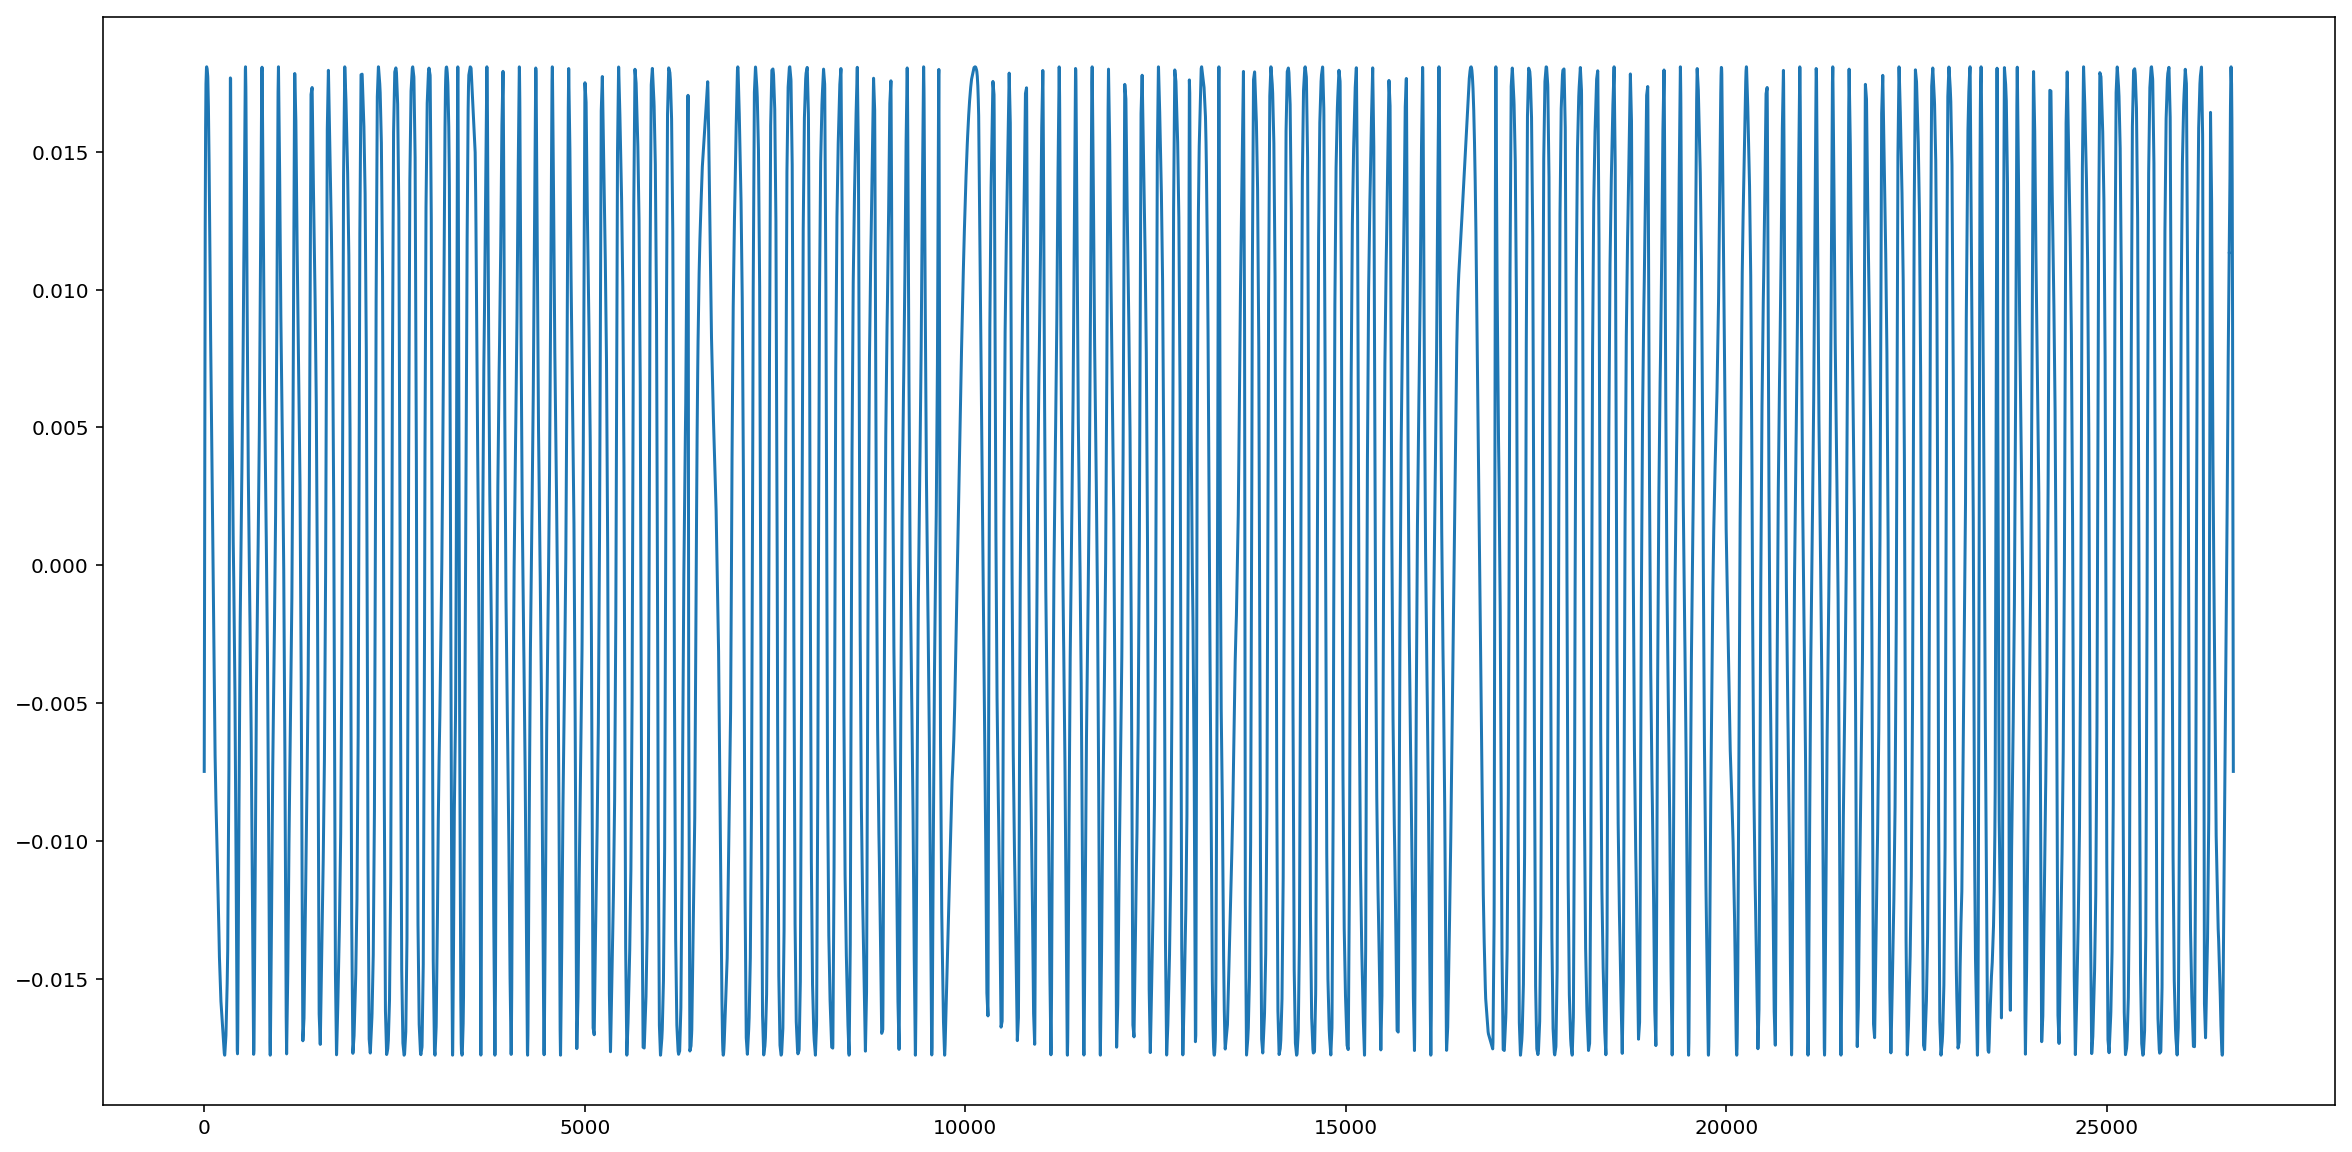

In [514]:
plt.figure(figsize=(20,10))
aux=b1_ho_loaded.copy()
aux=aux[aux['name']!='mybb:1']
myResults=(aux['bety'].values-b1DF['bety'].values)/b1DF['bety'].values
plt.plot(b1DF['s'].values,myResults)

In [515]:
myResults[0]

# Data from FILL 6868

In [62]:
myFill=6868
myTitle='FILL 6868'

In [63]:
# Analysis of the fill
fillDF=importData.LHCFillsByNumber([myFill])
fillDF[fillDF['mode']=='FILL']

,mode,startTime,endTime,duration
6868,FILL,2018-06-30 08:25:45.239000082+00:00,2018-07-01 08:02:33.473999977+00:00,23:36:48.234999


/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start_ipykernel.py:1: UserWarning: Discarding nonzero nanoseconds in conversion
  
/usr/local/bin/start

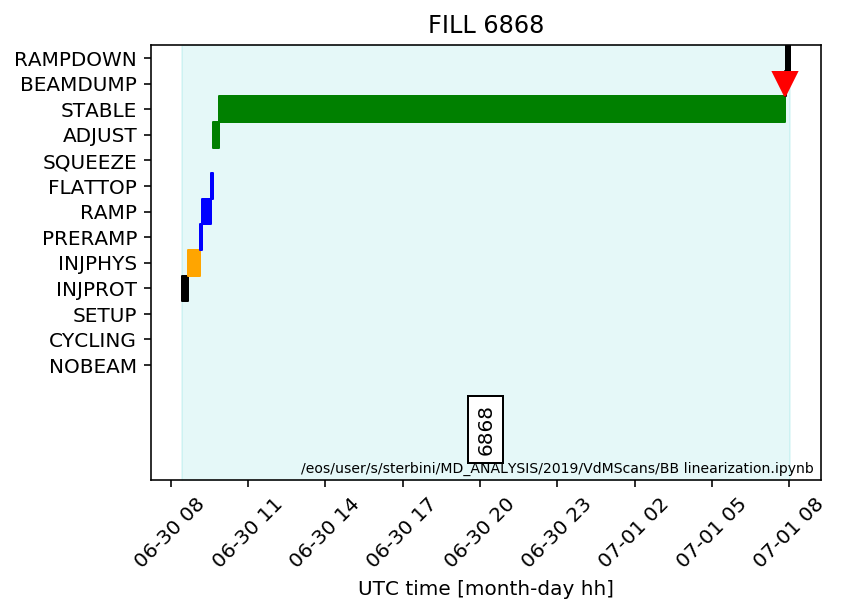

In [64]:
plotFunctions.plotLHCFill(fillDF,myTitle,pd.Timestamp('2018-06-30 08:25:45.239000082'))
plotFunctions.setSourcePlot(plt.gca(), mySource,color='k')

In [93]:
myDFLumi=importData.LHCCals2pd(['ALICE:LUMI_TOT_INST', 'ATLAS:LUMI_TOT_INST', 'CMS:LUMI_TOT_INST', 'LHCB:LUMI_TOT_INST'], myFill,beamModeList='STABLE')

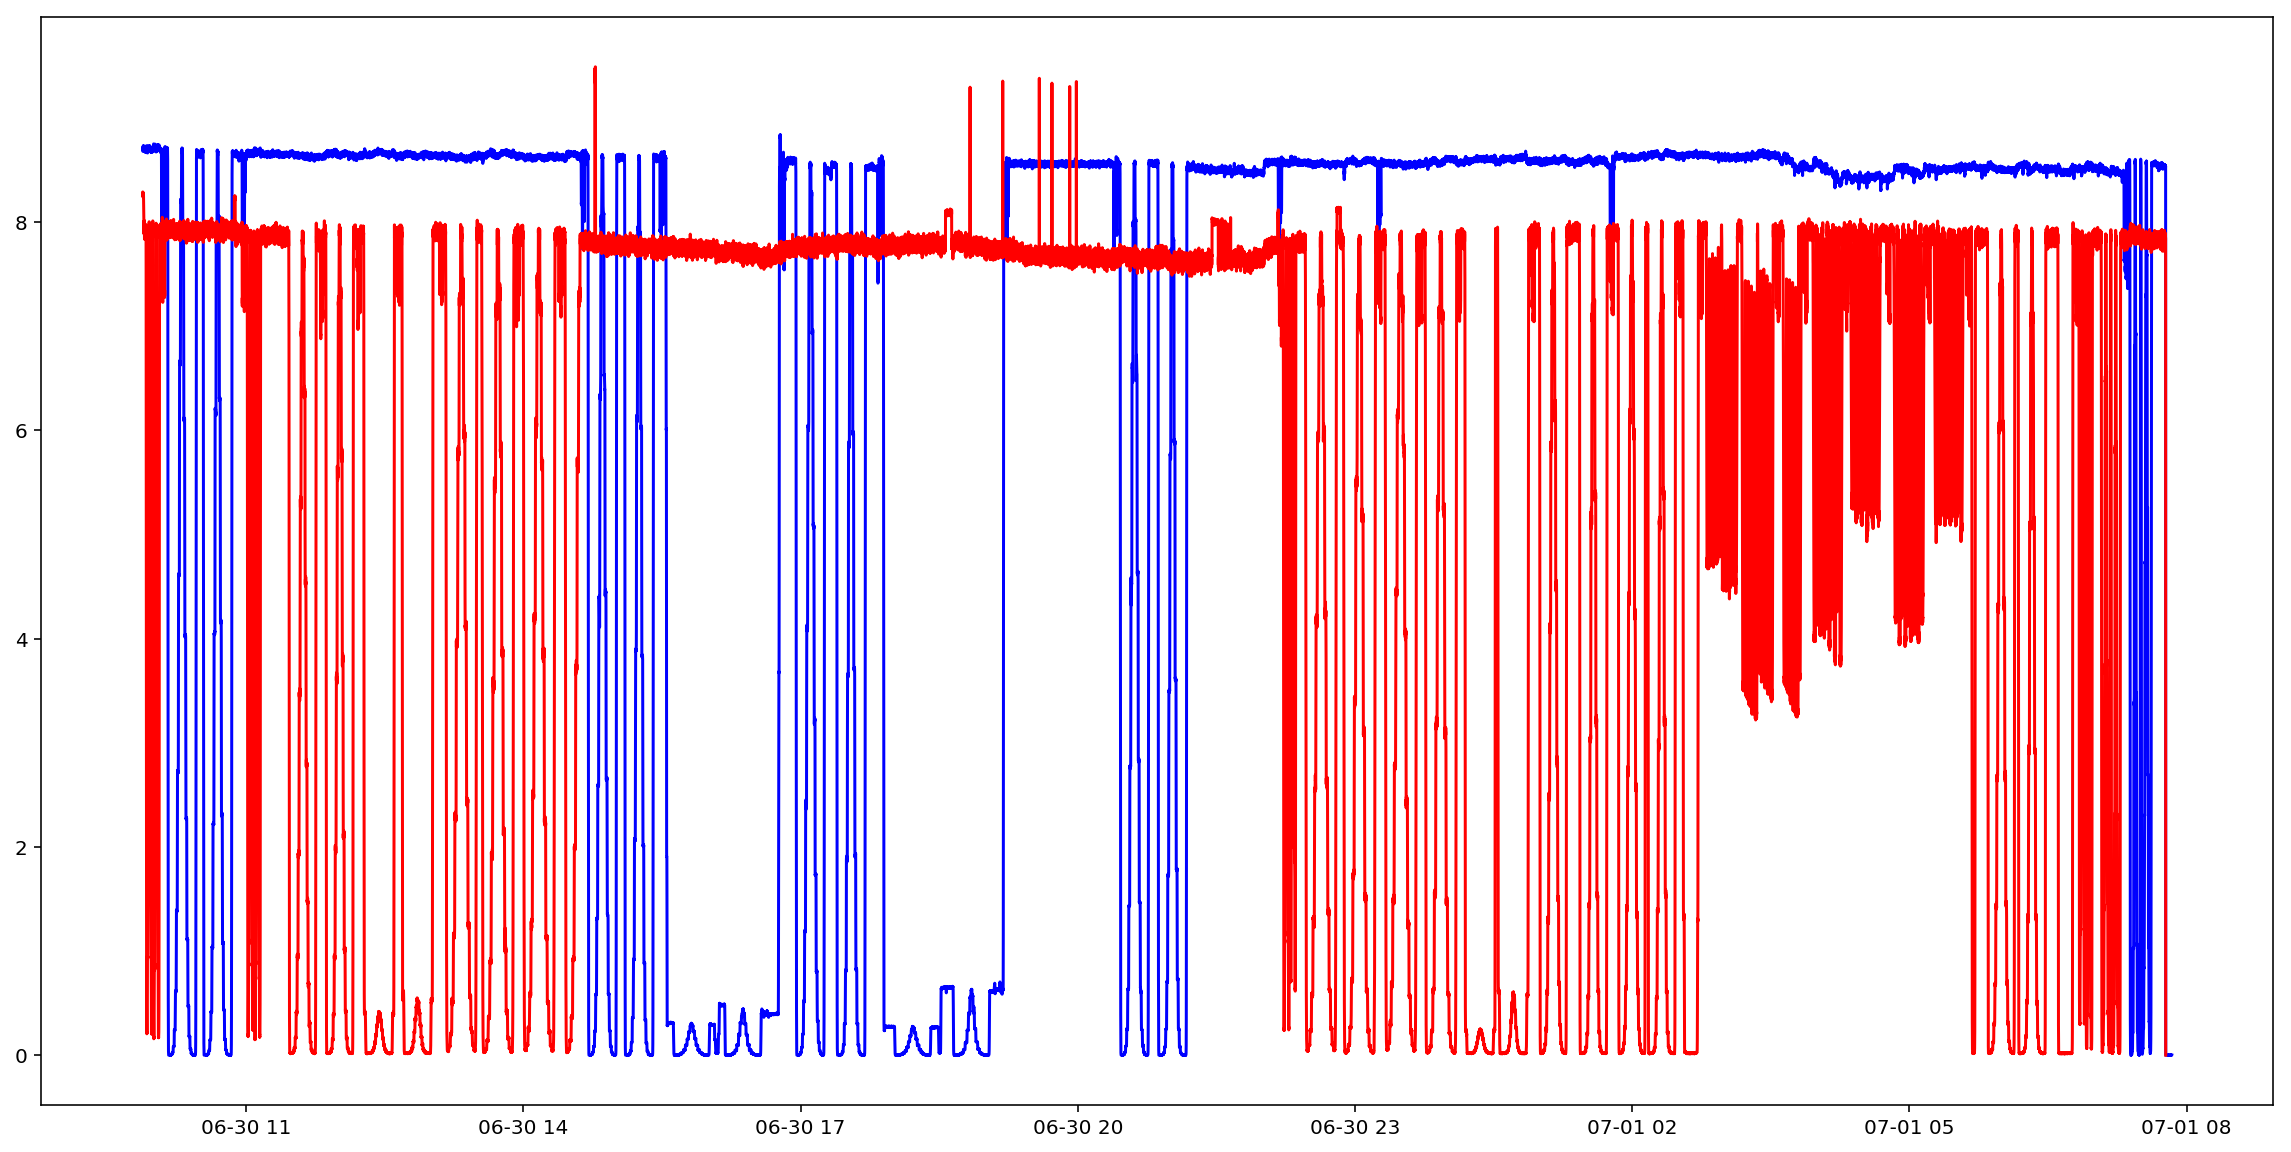

In [98]:
plt.figure(figsize=(20,10))
plt.plot(myDFLumi['ATLAS:LUMI_TOT_INST'].dropna(),'b')
plt.plot(myDFLumi['CMS:LUMI_TOT_INST'].dropna(),'r')

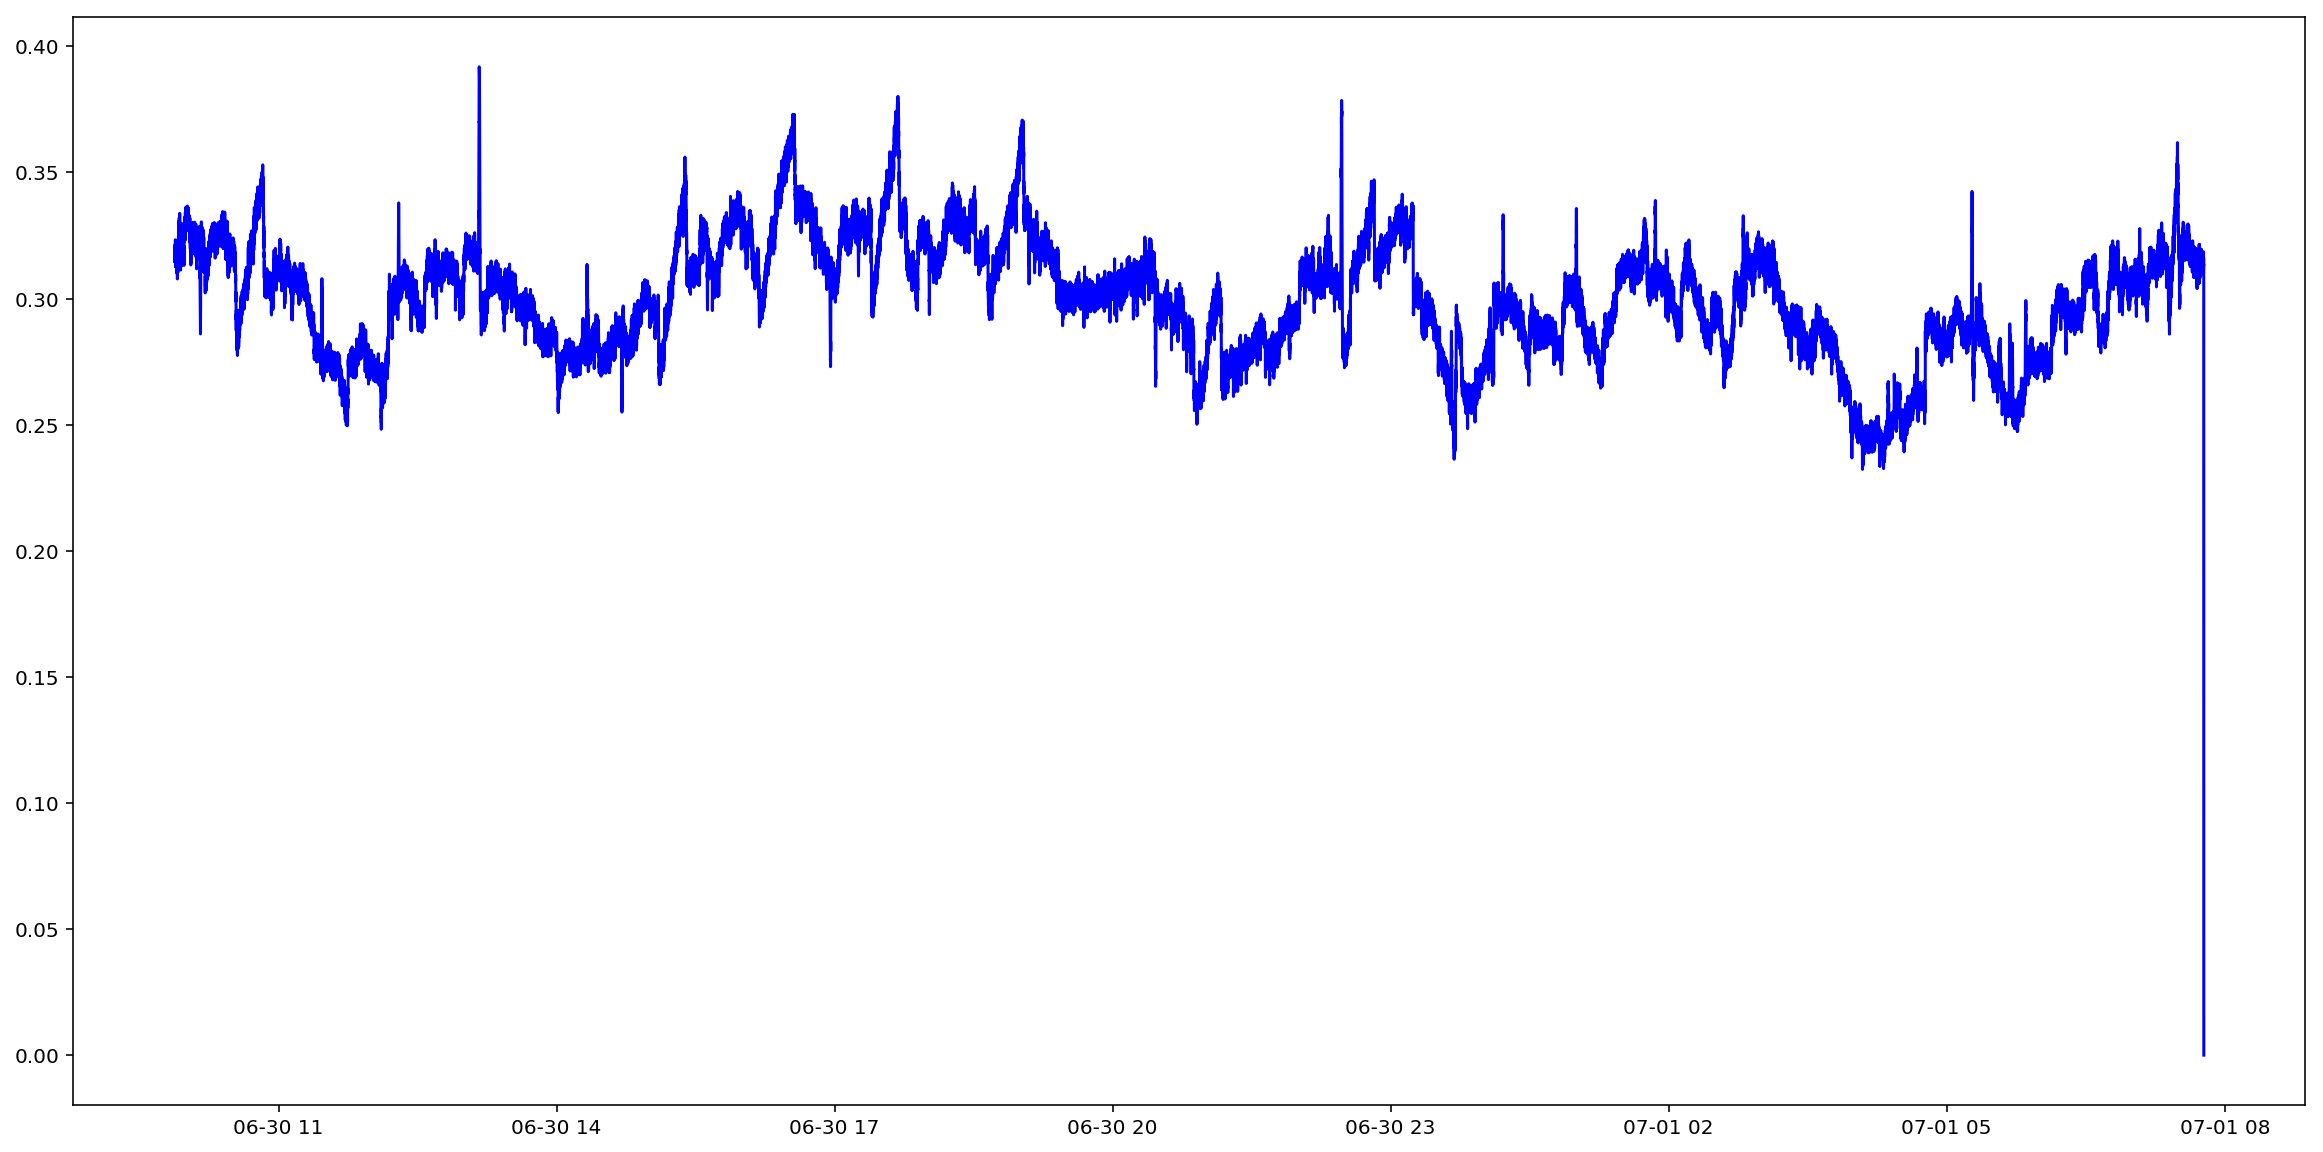

In [99]:
plt.figure(figsize=(20,10))
plt.plot(myDFLumi['ALICE:LUMI_TOT_INST'].dropna(),'b')

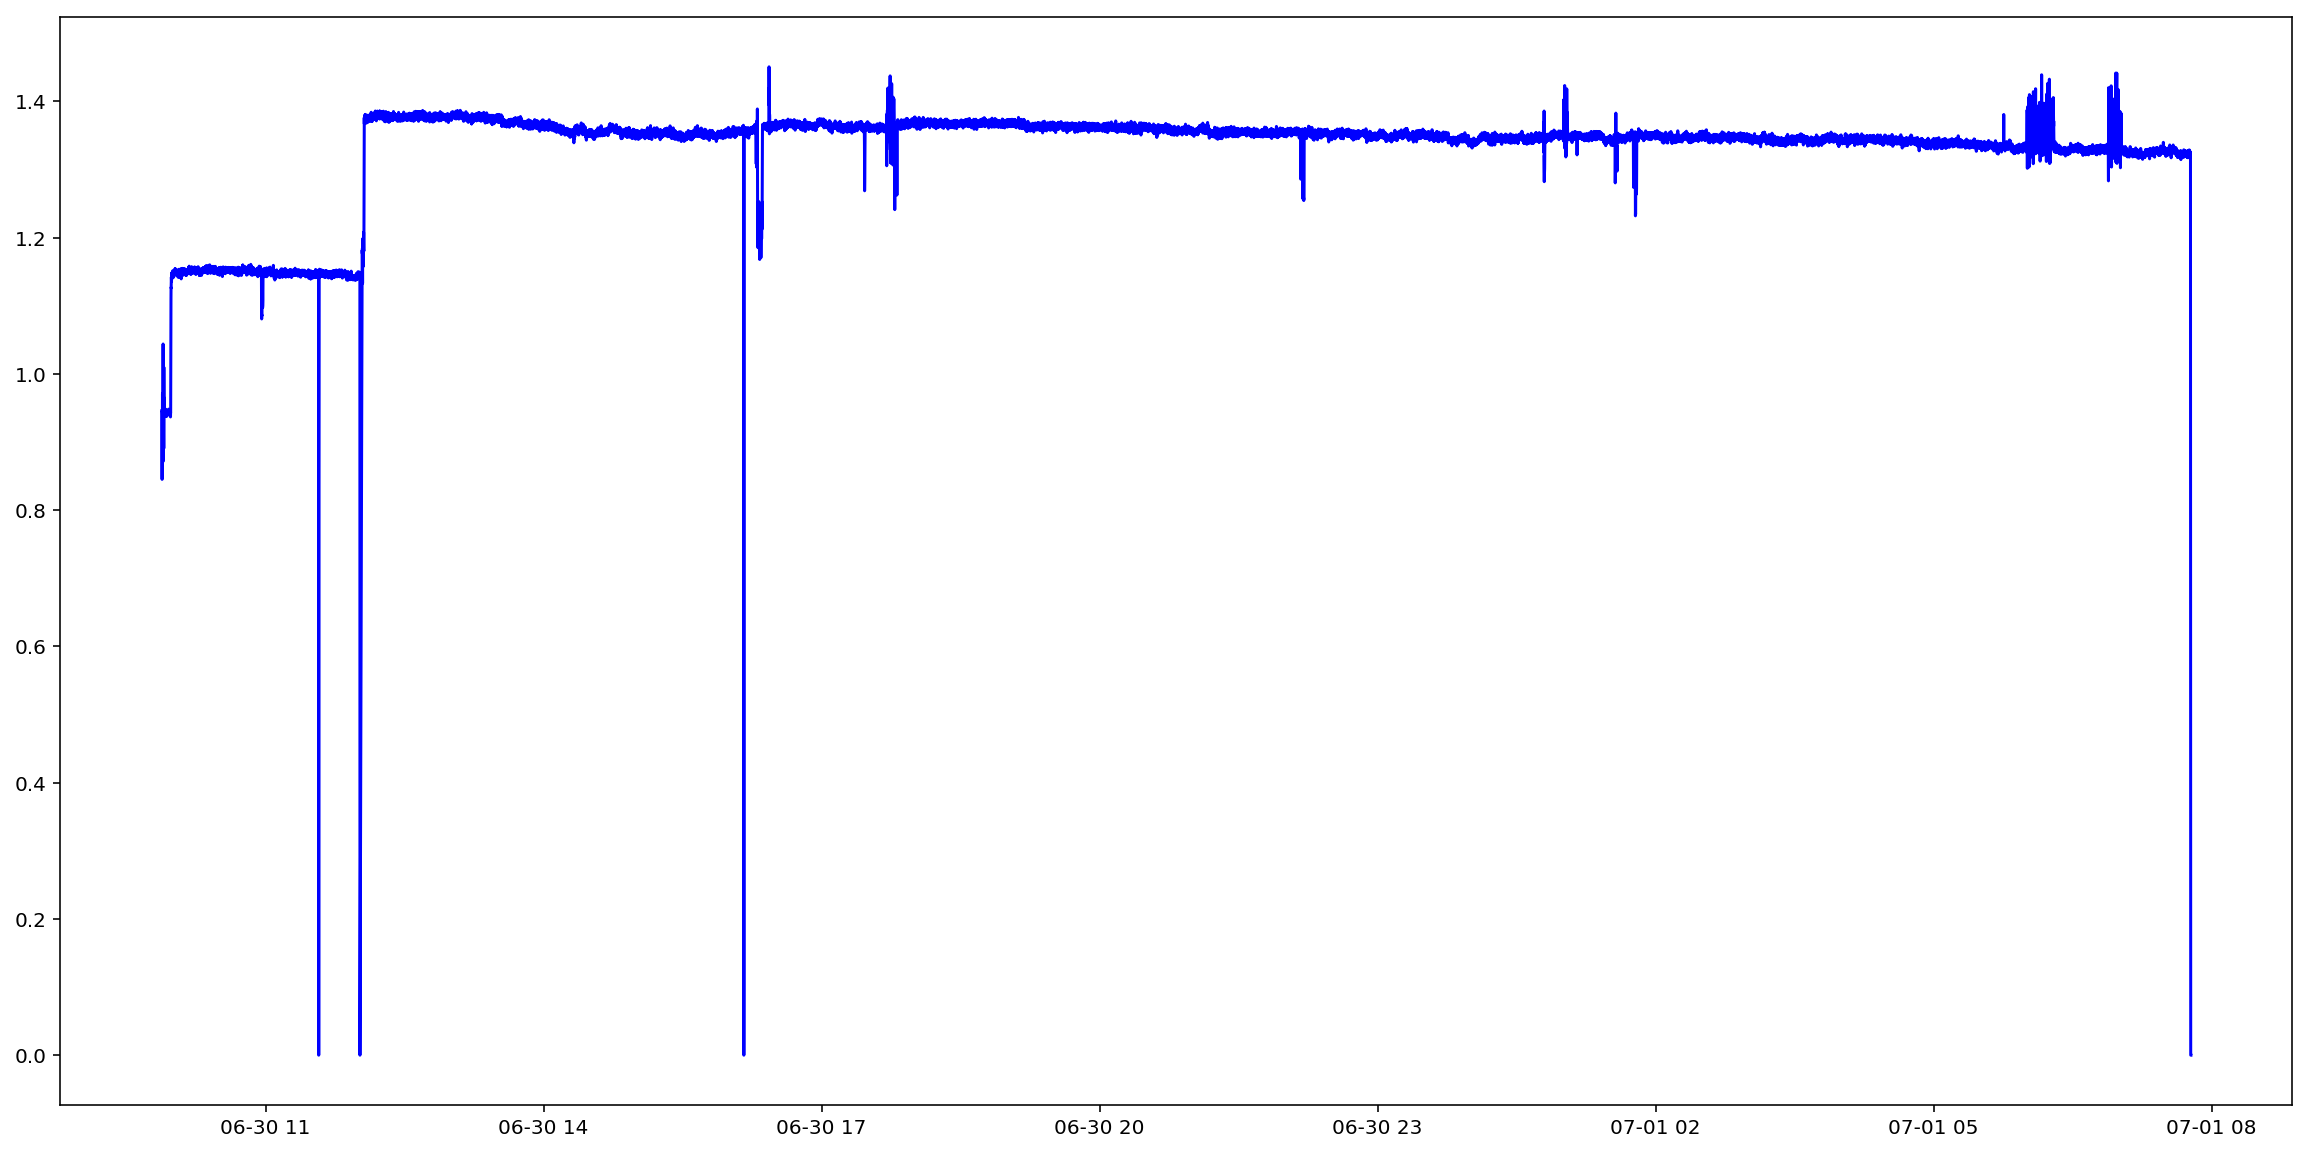

In [101]:
plt.figure(figsize=(20,10))
plt.plot(myDFLumi['LHCB:LUMI_TOT_INST'].dropna(),'b')

In [308]:
if 1:
    myDF=pd.read_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/BCTFR.pickle')
else:
    myDF=importData.LHCCals2pd(['LHC.BCTFR.A6R4.B%:BUNCH_INTENSITY'],[myFill],['STABLE'])
    myDF.to_pickle('/eos/user/s/sterbini/MD_ANALYSIS/2019/VdMScans/BCTFR.pickle')

In [338]:
len(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].iloc[0])

3564

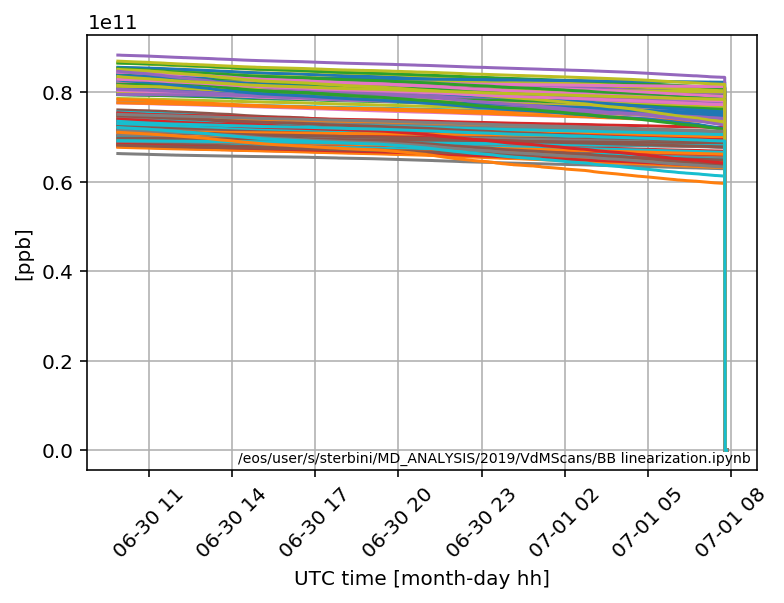

In [331]:
for i in np.where(np.array(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].iloc[0])>.2e11)[0]:
    plt.plot(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].apply(lambda x:x[i]))

plt.grid('on')
plt.xlabel('UTC time [month-day hh]');
plt.ylabel('[ppb]');
plt.xticks(rotation=45);
plotFunctions.setSourcePlot(plt.gca(), mySource,color='k')

In [326]:
aux=np.array(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].iloc[0])/np.array(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].iloc[-100])

/usr/local/bin/start_ipykernel.py:1: RuntimeWarning: invalid value encountered in true_divide
  


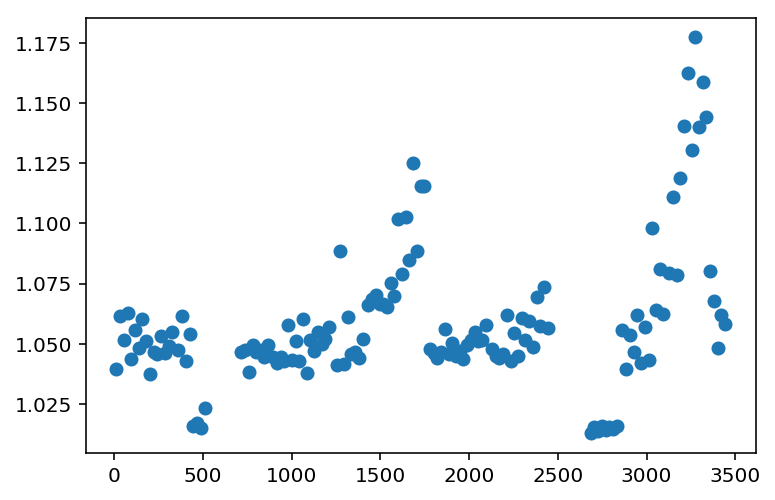

In [327]:
plt.plot(aux,'o')

/usr/local/bin/start_ipykernel.py:1: RuntimeWarning: invalid value encountered in greater
  


array([1600, 1642, 1684, 1726, 1747, 3148, 3190, 3211, 3232, 3253, 3274,
       3295, 3316, 3337])

/usr/local/bin/start_ipykernel.py:1: RuntimeWarning: invalid value encountered in greater
  


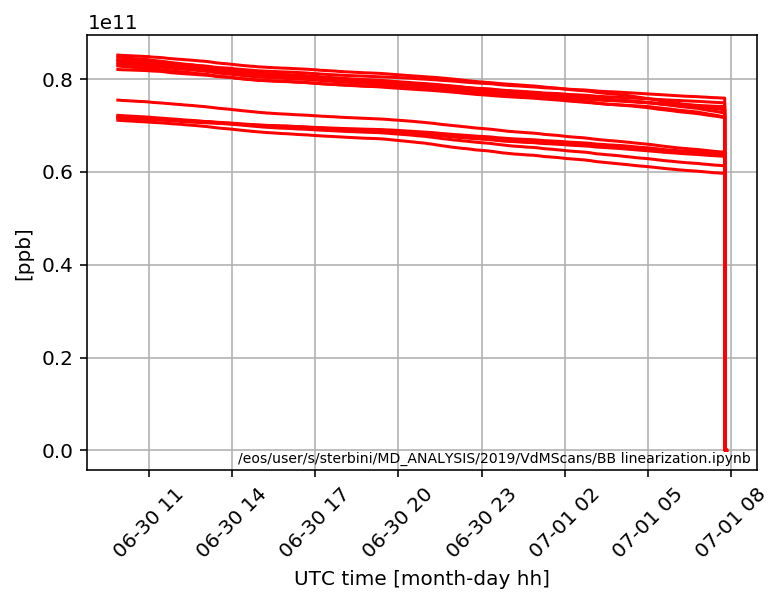

In [334]:
for i in np.where(aux>1.10)[0]:
    plt.plot(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].apply(lambda x:x[i]),'r')

plt.grid('on')
plt.xlabel('UTC time [month-day hh]');
plt.ylabel('[ppb]');
plt.xticks(rotation=45);
plotFunctions.setSourcePlot(plt.gca(), mySource,color='k')

/usr/local/bin/start_ipykernel.py:1: RuntimeWarning: invalid value encountered in less
  
/usr/local/bin/start_ipykernel.py:4: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


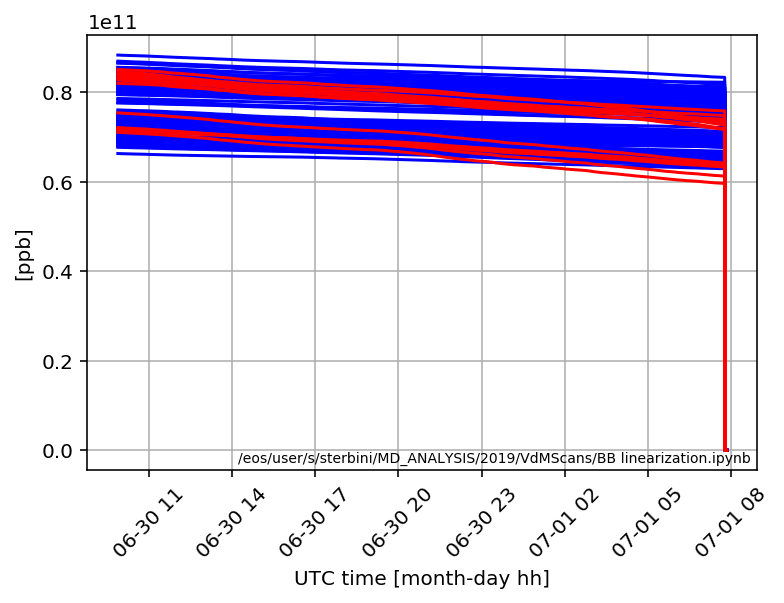

In [337]:
for i in np.where(aux<1.10)[0]:
    plt.plot(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].apply(lambda x:x[i]),'b')
    
for i in np.where(aux>1.10)[0]:
    plt.plot(myDF['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].apply(lambda x:x[i]),'r')
plt.grid('on')
plt.xlabel('UTC time [month-day hh]');
plt.ylabel('[ppb]');
plt.xticks(rotation=45);
plotFunctions.setSourcePlot(plt.gca(), mySource,color='k')

   # Symbolic computation
   Starting from 2.6 Section of A. Chao et al., **Handbook of Accelerator Physics and Engineering**, we can express the HO BB as function of the BB parameter $\xi$.

In [340]:
import sympy as sy
import numpy as np
from ipywidgets import interactive
from sympy import init_session
init_session() 
la=np.linalg
%config IPCompleter.greedy=True
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # retina display

IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [375]:
mu_0=sy.Symbol('mu_0', positive=True, real=True);
beta_0=sy.Symbol('beta_0', positive=True, real=True);
xi_0=sy.Symbol('xi_0', positive=True, real=True);

R=sy.Matrix([[sy.cos(mu_0),beta_0*sy.sin(mu_0)], [-sy.sin(mu_0)/beta_0,sy.cos(mu_0)]])
BB=sy.Matrix([[1,0], [-4*sy.pi*xi_0/beta_0,1]])
M_OTM=R@BB
M_OTM

⎡-4⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀)   β₀⋅sin(μ₀)⎤
⎢                                      ⎥
⎢  4⋅π⋅ξ₀⋅cos(μ₀)   sin(μ₀)            ⎥
⎢- ────────────── - ───────   cos(μ₀)  ⎥
⎣        β₀            β₀              ⎦

In [376]:
eigenVectors=M_OTM.eigenvects()
eigenVectors=sy.simplify(eigenVectors)
eigenVectors

⎡⎛                                                                      ⎡⎡    
⎢⎜                     __________________________________               ⎢⎢────
⎢⎜                    ╱                            2                    ⎢⎢    
⎢⎜-2⋅π⋅ξ₀⋅sin(μ₀) - ╲╱  (-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))  - 1  + cos(μ₀), 1, ⎢⎢    
⎢⎜                                                                      ⎢⎢-2⋅π
⎢⎜                                                                      ⎢⎢    
⎣⎝                                                                      ⎣⎣    

                  -β₀⋅sin(μ₀)                      ⎤⎤⎞  ⎛                     
───────────────────────────────────────────────────⎥⎥⎟  ⎜                     
                 __________________________________⎥⎥⎟  ⎜                    ╱
                ╱                            2     ⎥⎥⎟, ⎜-2⋅π⋅ξ₀⋅sin(μ₀) + ╲╱ 
⋅ξ₀⋅sin(μ₀) + ╲╱  (-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))  - 1 ⎥⎥⎟  ⎜                     
                                                   

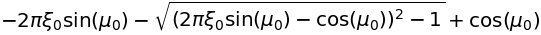

In [377]:
sy.simplify(eigenVectors[0][0])

This means 
\begin{equation}
\underbrace{
\cos\mu_{0} - 2 \pi \xi_{0} \sin\mu_{0}}_{cos \mu} - \underbrace{\sqrt{\left(\cos\mu_{0}-2 \pi \xi_{0} \sin\mu_{0} \right)^{2} - 1}}_{i \sin \mu}
\end{equation}

that is
\begin{equation}
cos \mu=\cos\mu_{0} - 2 \pi \xi_{0} \sin\mu_{0}.
\end{equation}

For small $\xi_{0}$ then $\mu=\mu_0+ 2 \pi \xi_{0}$.

In [378]:
# stability condition 
sy.simplify(sy.solve([eigenVectors[0][0]+eigenVectors[1][0]<2,eigenVectors[0][0]+eigenVectors[1][0]>-2],xi_0))

This means 
\begin{equation}
4 \pi \xi_{0} \sin \mu_{0}<2 \cos \mu_{0}+2 
\end{equation}

and therefore
\begin{equation}
\xi_{0}<\frac{1}{2\pi} \cot{\frac{\mu_{0}}{2}}
\end{equation}

and

\begin{equation}
4 \pi \xi_{0} \sin \mu_{0}>2 \cos \mu_{0}-2 
\end{equation}
and therefore

\begin{equation}
\xi_{0}>-\frac{1}{2\pi} \tan{\frac{\mu_{0}}{2}}
\end{equation}

The two expressions need to be fulfilled in the two planes.


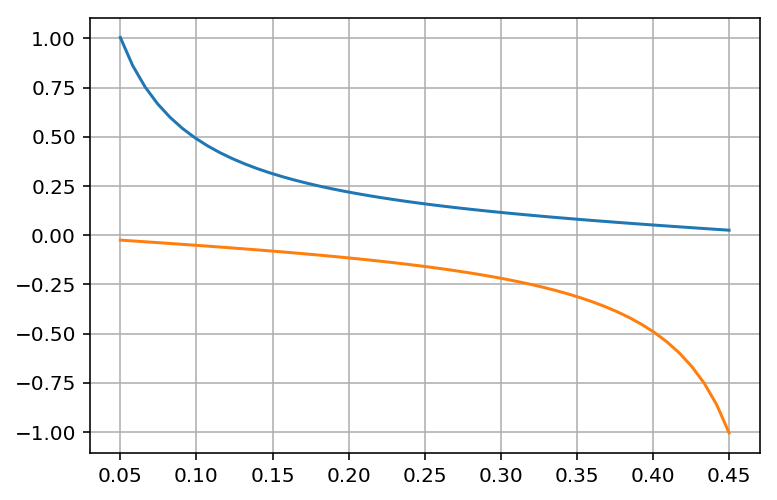

In [386]:
myMu=np.linspace(.1*np.pi,np.pi/2*1.8)
plt.plot(myMu/2/np.pi,1/2/np.pi/np.tan(myMu/2))
plt.plot(myMu/2/np.pi,-1/2/np.pi*np.tan(myMu/2))
plt.grid(True)

### $\beta$-beating

In [389]:
R=sy.Matrix([[sy.cos(mu_0),beta_0*sy.sin(mu_0)], [-sy.sin(mu_0)/beta_0,sy.cos(mu_0)]])
BB_half=sy.Matrix([[1,0], [-4*sy.pi*xi_0/beta_0/2,1]])
M_OTM=BB_half@R@BB_half
M_OTM

⎡                   -2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀)                            β₀⋅si
⎢                                                                             
⎢  2⋅π⋅ξ₀⋅(-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))   2⋅π⋅ξ₀⋅cos(μ₀)   sin(μ₀)              
⎢- ────────────────────────────────── - ────────────── - ───────  -2⋅π⋅ξ₀⋅sin(
⎣                  β₀                         β₀            β₀                

n(μ₀)        ⎤
             ⎥
             ⎥
μ₀) + cos(μ₀)⎥
             ⎦

In [391]:
eigenVectors=M_OTM.eigenvects()
eigenVectors=sy.simplify(eigenVectors)
eigenVectors

⎡⎛                                                                      ⎡⎡    
⎢⎜                     __________________________________               ⎢⎢────
⎢⎜                    ╱                            2                    ⎢⎢   _
⎢⎜-2⋅π⋅ξ₀⋅sin(μ₀) - ╲╱  (-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))  - 1  + cos(μ₀), 1, ⎢⎢  ╱ 
⎢⎜                                                                      ⎢⎢╲╱  
⎢⎜                                                                      ⎢⎢    
⎣⎝                                                                      ⎣⎣    

         -β₀⋅sin(μ₀)             ⎤⎤⎞  ⎛                                       
─────────────────────────────────⎥⎥⎟  ⎜                     __________________
_________________________________⎥⎥⎟  ⎜                    ╱                  
                           2     ⎥⎥⎟, ⎜-2⋅π⋅ξ₀⋅sin(μ₀) + ╲╱  (-2⋅π⋅ξ₀⋅sin(μ₀) 
(-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))  - 1 ⎥⎥⎟  ⎜                                       
                                 ⎥⎥⎟  ⎜            

In [392]:
# P definition
P=sy.Matrix([[eigenVectors[1][2][0][0]*eigenVectors[0][2][0][0],eigenVectors[0][2][0][0]*eigenVectors[1][2][0][0]],[eigenVectors[1][2][0][1]*eigenVectors[0][2][0][0],eigenVectors[0][2][0][1]*eigenVectors[1][2][0][0]]])
P=sy.simplify(P)
P=sy.simplify(P*(1/(sy.sqrt((P.det()*sy.I)))))
P

⎡                                          ____    2                          
⎢                                    -√2⋅╲╱ β₀ ⋅sin (μ₀)                      
⎢     ────────────────────────────────────────────────────────────────────────
⎢              ______________________________________                         
⎢             ╱                   3                                           
⎢            ╱              -ⅈ⋅sin (μ₀)               ⎛                       
⎢     2⋅    ╱   ──────────────────────────────────── ⋅⎝(2⋅π⋅ξ₀⋅sin(μ₀) - cos(μ
⎢          ╱                                     3/2                          
⎢         ╱     ⎛                          2    ⎞                             
⎢       ╲╱      ⎝(2⋅π⋅ξ₀⋅sin(μ₀) - cos(μ₀))  - 1⎠                             
⎢                                                                             
⎢                                        -√2⋅sin(μ₀)                          
⎢───────────────────────────────────────────────────

In [393]:
# P inverse definition
Pinv=sy.simplify(P.inv())
Pinv

⎡             _______________________________________                         
⎢            ╱                    3                                           
⎢           ╱               -ⅈ⋅sin (μ₀)               ⎛                       
⎢   √2⋅    ╱   ───────────────────────────────────── ⋅⎝- (-2⋅π⋅ξ₀⋅sin(μ₀) + co
⎢         ╱                                      3/2                          
⎢        ╱     ⎛                           2    ⎞                             
⎢      ╲╱      ⎝(-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))  - 1⎠                             
⎢   ──────────────────────────────────────────────────────────────────────────
⎢                                         ____    2                           
⎢                                     2⋅╲╱ β₀ ⋅sin (μ₀)                       
⎢                                                                             
⎢                                                                             
⎢                                         √2⋅ⅈ⋅sin(μ

In [394]:
# D definition
D=sy.Matrix([[eigenVectors[1][0],0],[0,eigenVectors[0][0]]])
D=sy.simplify(D)
D

⎡                     __________________________________                      
⎢                    ╱                            2                           
⎢-2⋅π⋅ξ₀⋅sin(μ₀) + ╲╱  (-2⋅π⋅ξ₀⋅sin(μ₀) + cos(μ₀))  - 1  + cos(μ₀)            
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                0                                  -2⋅π⋅ξ₀⋅si

                                                      ⎤
                                                      ⎥
                     0                                ⎥
                                                      ⎥
           _________________________________          ⎥
          ╱                           2               ⎥
n(μ₀) - ╲╱  (2⋅π⋅ξ₀⋅sin(μ₀) - cos(μ₀))  - 1  + cos(μ₀)⎦

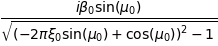

In [414]:
sy.simplify(2*P[0]**2)

In [415]:
# alpha at the center 
sy.simplify(P[0]*(P[2]+P[3]))

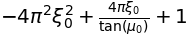

In [426]:
sy.simplify(sy.expand((1-(sy.cos(mu_0)-2*sy.pi*xi_0*sy.sin(mu_0))**2)/sy.sin(mu_0)**2))

In [452]:
# Example of tune shift
beta_IP= b1DF[atIP1]['betx'].values[0]
N=0.85e11
r0=1.534689e-18
gammaepsilon=4e-6
Dkl=1/beta_IP*N*r0/gammaepsilon
myXi=-Dkl*beta_IP/4/np.pi
myXi

In [489]:
def betaBeatingFormula(xi, Q,N=0.00001e11, gammaepsilon=4e-6):
    r0=1.534689e-18
    myXi=-1*N*r0/gammaepsilon/4/np.pi

    return 1/np.sqrt(1+4*np.pi*myXi/np.tan(2*np.pi*Q)-4*np.pi**2*myXi**2)-1

In [490]:
betaBeatingFormula(xi=myXi,Q=.31)

In [491]:
pd.DataFrame(BetaBeating(name='ip1:1',df=b1DF, N=0.00001e11, gammaepsilon=4e-6)).iloc[0].betaBeating_X

In [464]:
# Function to compute beta-beating
def BetaBeating(name='ip1:1',df=b1DF, N=0.8e11, gammaepsilon=4e-6) :
    r0=1.534689e-18
    nameDF=df[df['name']==name]
    
    beta_x=nameDF['betx'].values
    mu_x=nameDF['mux'].values
    Dkl_x=1/beta_x*N*r0/gammaepsilon
    Qx=df['mux'].values[-1]
    
    beta_y=nameDF['bety'].values
    mu_y=nameDF['muy'].values
    Dkl_y=1/beta_y*N*r0/gammaepsilon
    Qy=df['muy'].values[-1]
    
    output={'s':df['s'],\
            'name':df['name'],\
            'betaBeating_X':1/2/np.sin(2*np.pi*Qx)*Dkl_x*beta_x* np.cos(2*np.pi*np.abs(df['mux']-mu_x)-2*np.pi*Qx),\
            'betaBeating_Y':1/2/np.sin(2*np.pi*Qy)*Dkl_y*beta_y* np.cos(2*np.pi*np.abs(df['muy']-mu_y)-2*np.pi*Qy),\
            }
    return output